---
title: "Waiting time analysis"
---

[Archived notebook using Python and R](analysis/01_occurence_rate.ipynb)

## Notes

- Occurence rate is related to the waiting time distribution.

It is hard to remove duplicate events when combining multiple datasets with different τ. So when using the combined dataset, the occurence rate would be overestimated.


> An analysiswas carried out to determine the probability distribution governing the time interval between successive discontinuities. The times at which the discontinuities occurred,obtainedfromthe identificationprogram, were used to computethe time difference, $τ = T_j - T_{j-1}$, the so-called interarrival interval. The number of cases were then tabulated corresponding to discreteranges of τ, and a histogramwas prepared.By properly normalizing the numberof casesin each range a probability distribution function giving the relative frequency of occurrencewas obtained. A similar study was previously carried out by Burlaga[1969].



In [1]:
using DrWatson
@quickactivate
include(srcdir("main.jl"))

using CairoMakie

In [2]:
# j_events_taus = load_taus(60:-10:20);
wind_df = load(datadir("updated_events_Wind_tr=20110825-20160630_method=fit_tau=0:01:00_ts=0:00:00.090909.arrow"));
# jno_df = load(datadir("updated_events_JNO_method=fit_tau=0:01:00_ts=0:00:01.arrow"));
jno_df = load(datadir("updated_events_JNO_tr=20110825-20160630_method=fit_tau=0:01:00_ts=0:00:01.arrow"));

┌ Warning: automatically converting Arrow.Timestamp with precision = MICROSECOND to `DateTime` which only supports millisecond precision; conversion may be lossy; to avoid converting, pass `Arrow.Table(source; convert=false)
└ @ Arrow /Users/zijin/.julia/packages/Arrow/rIDSw/src/eltypes.jl:273
┌ Warning: automatically converting Arrow.Timestamp with precision = NANOSECOND to `DateTime` which only supports millisecond precision; conversion may be lossy; to avoid converting, pass `Arrow.Table(source; convert=false)
└ @ Arrow /Users/zijin/.julia/packages/Arrow/rIDSw/src/eltypes.jl:273


In [3]:
subset_jno(df, r) = subset(df, :radial_distance => x -> round_c.(x) .== r)
subset_time(df, t) = subset(df, :time => x -> x .< t)

subset_time (generic function with 1 method)

In [4]:
df = wind_df;
df_s1 = subset(df, :time => t -> year.(t) .== 2013);
df_s2 = subset(df_s1, :time => t -> month.(t) .< 2);

jno_df_s1 = subset_jno(jno_df, 1);
jno_df_s2 = subset_jno(jno_df, 5);

In [49]:
using Distributions

function plot_wt_pdf_lim(
    df;
    kwargs...
)
    f = plot_wt_pdf(df; kwargs...)
    xlims!(1, 1000)
    # ylims!(5e-4, 8e-2)
    ylims!(1e-5, 8e-2)
    return f
end

plot_wt_pdf_lim (generic function with 1 method)

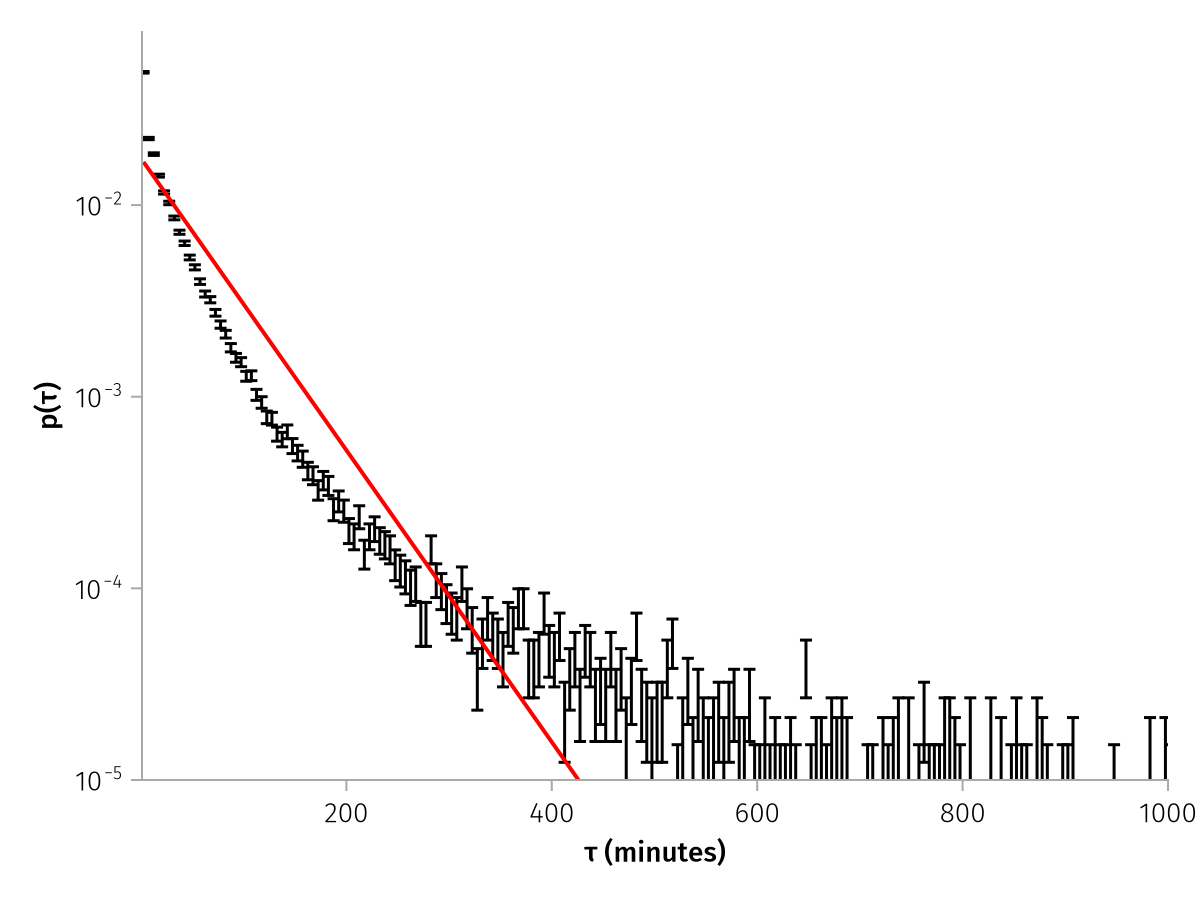

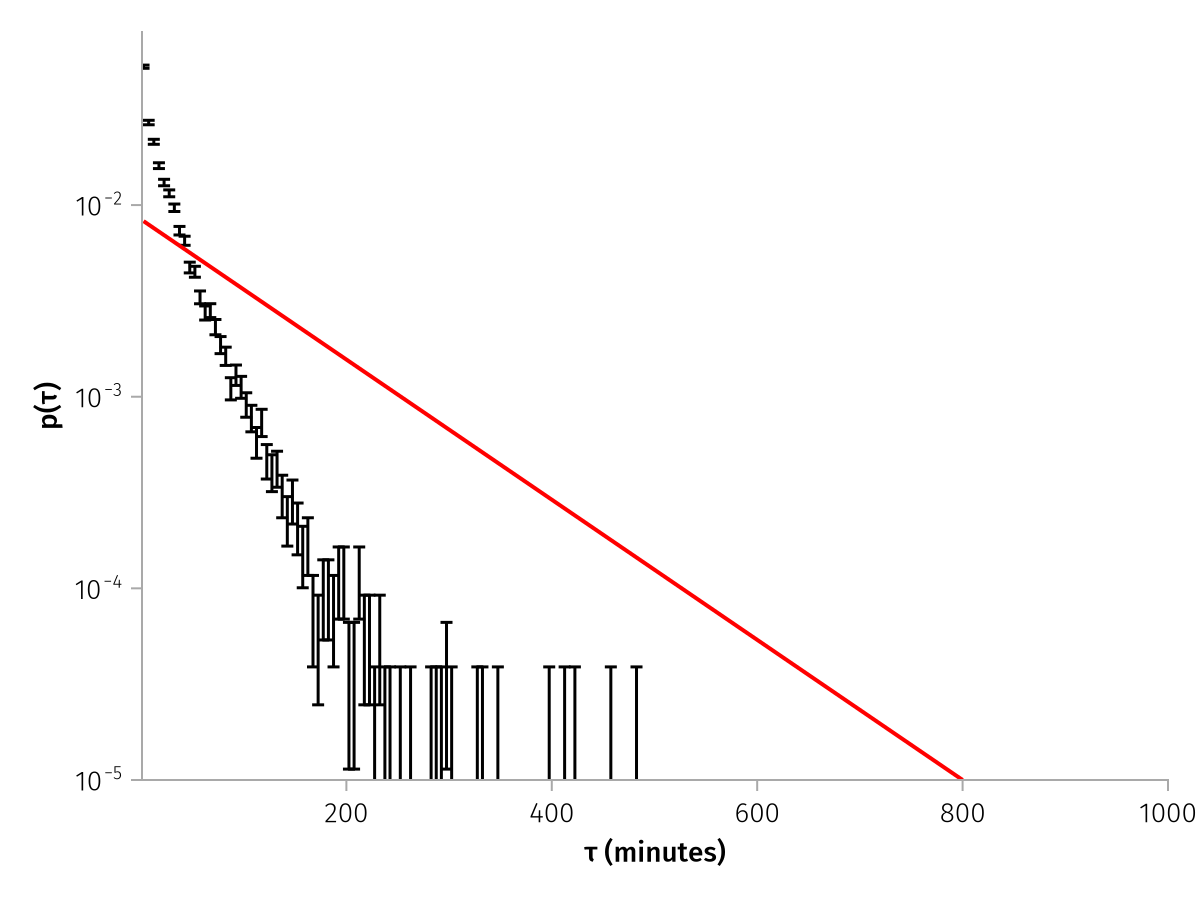

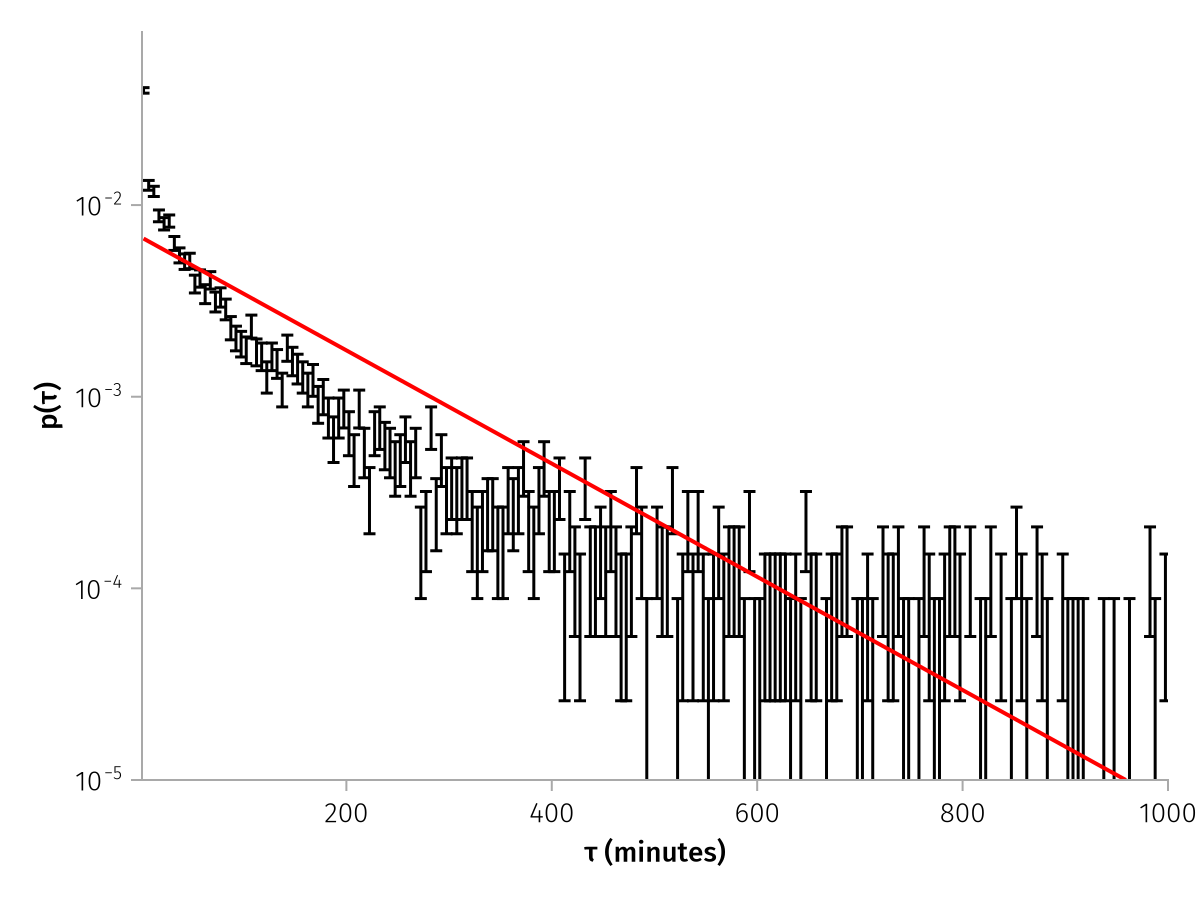

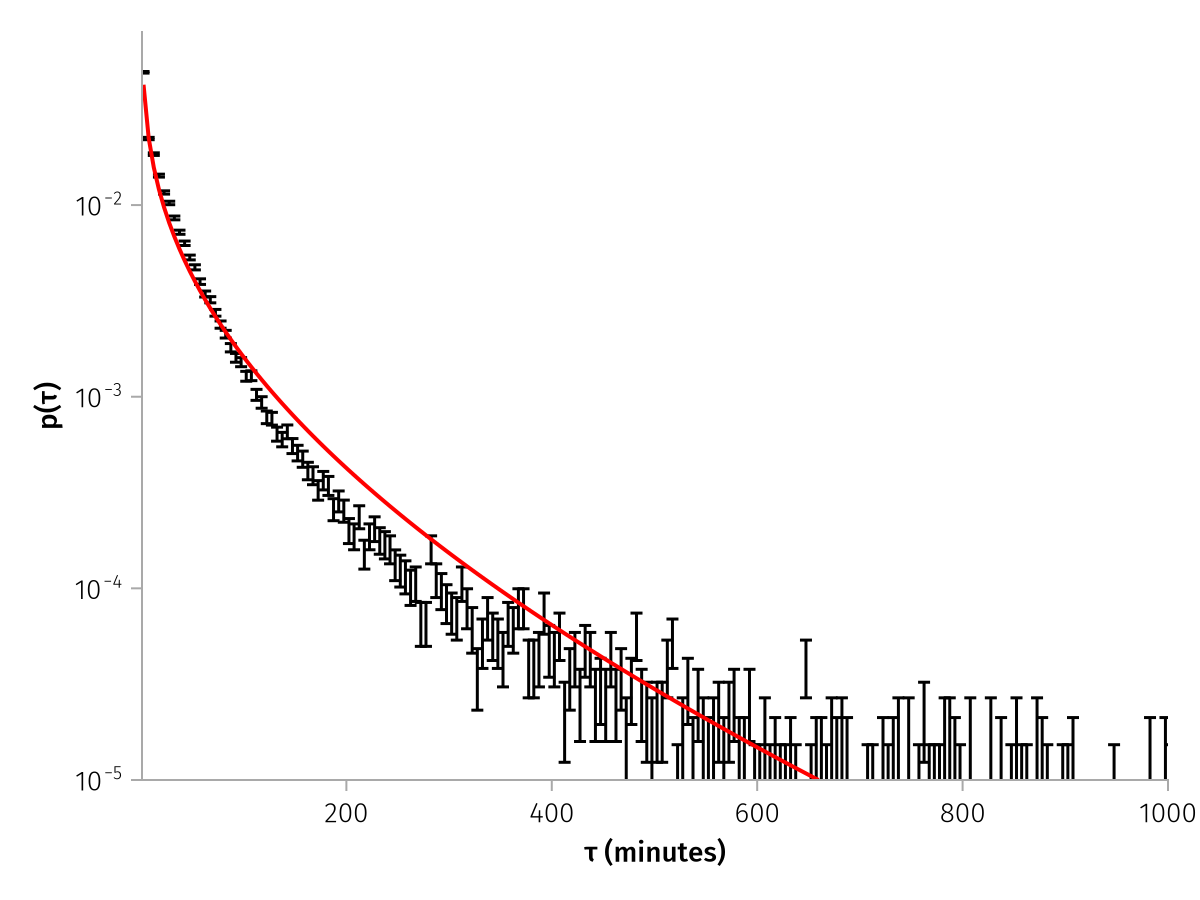

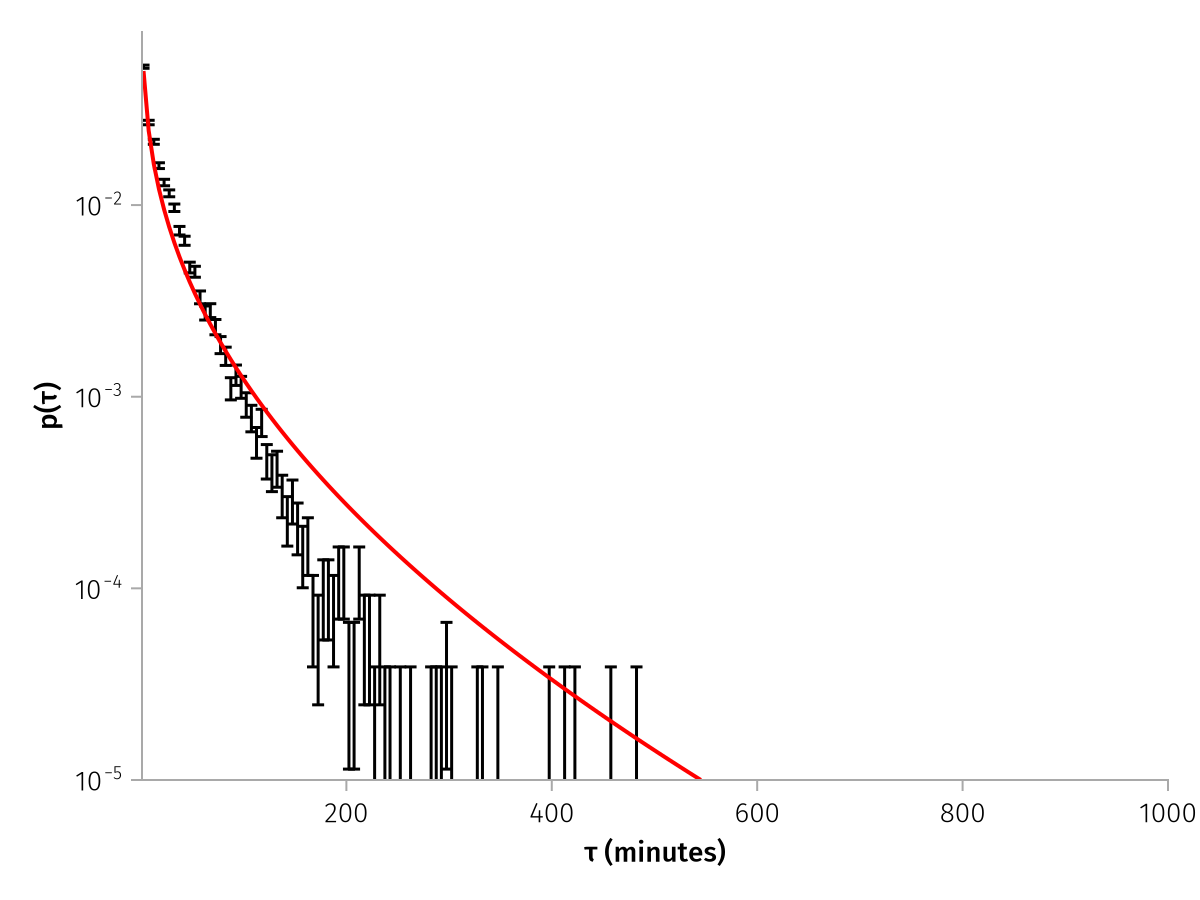

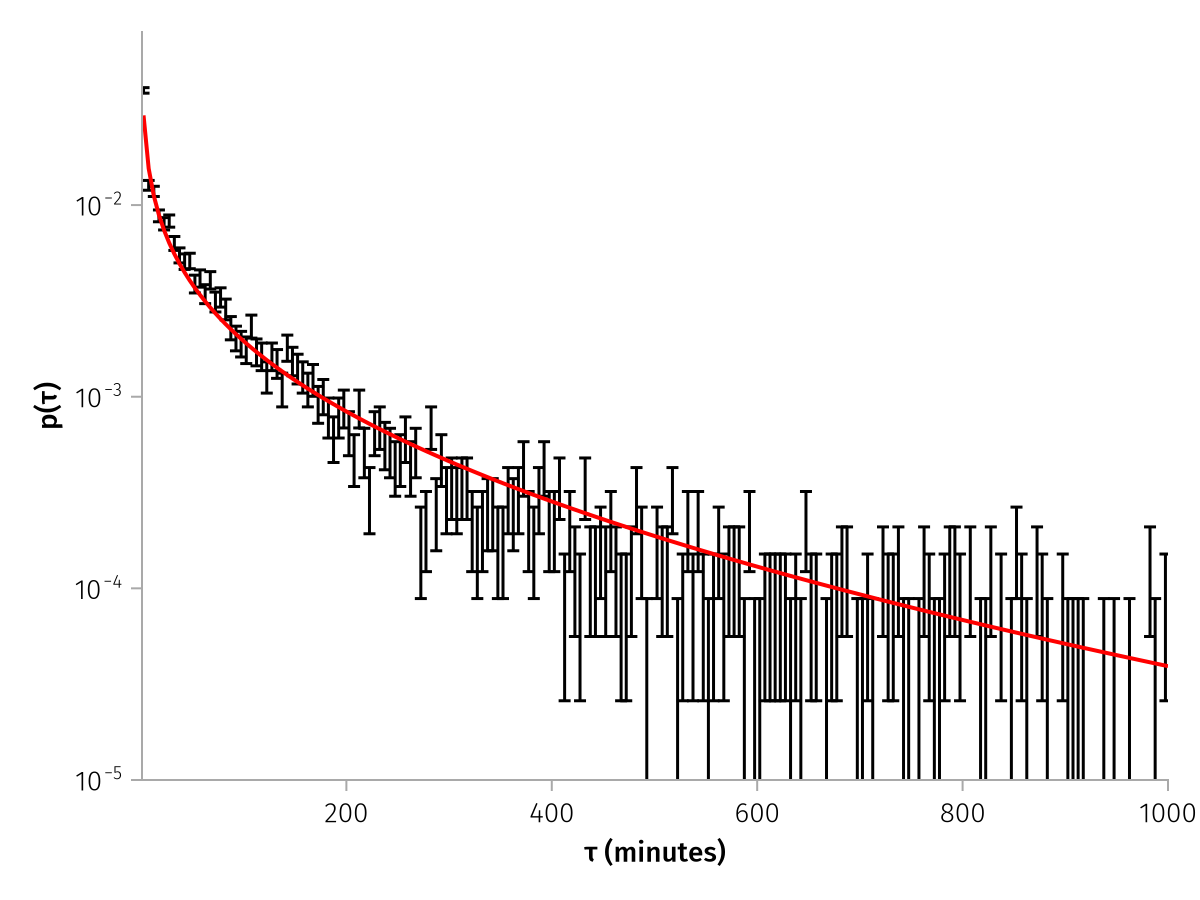

In [54]:
#| column: page
#| layout-ncol: 3
dfs = [ jno_df, jno_df_s1, jno_df_s2 ]
fgs_e = plot_wt_pdf_lim.(dfs, dist=Exponential)
fgs_w = plot_wt_pdf_lim.(dfs, dist=Weibull)
display.(fgs_e);
display.(fgs_w);

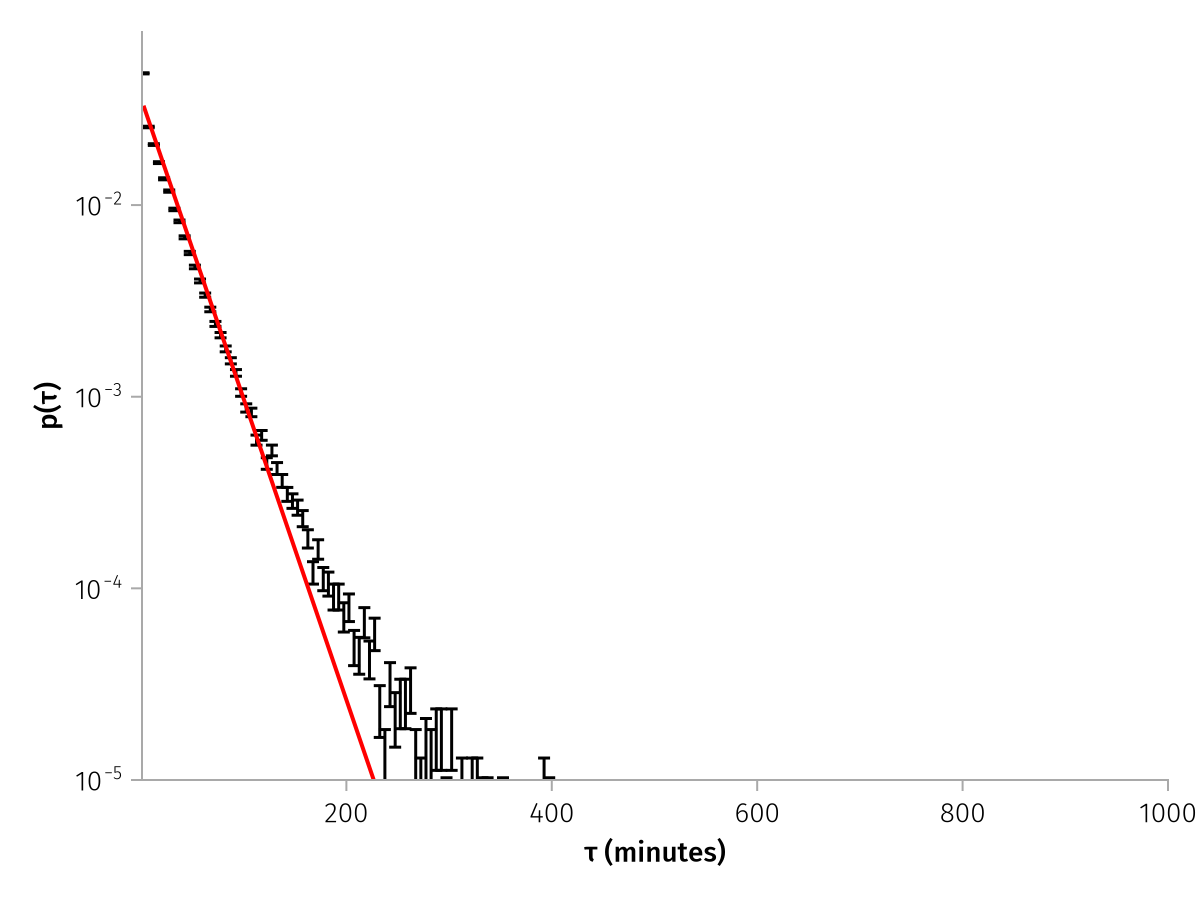

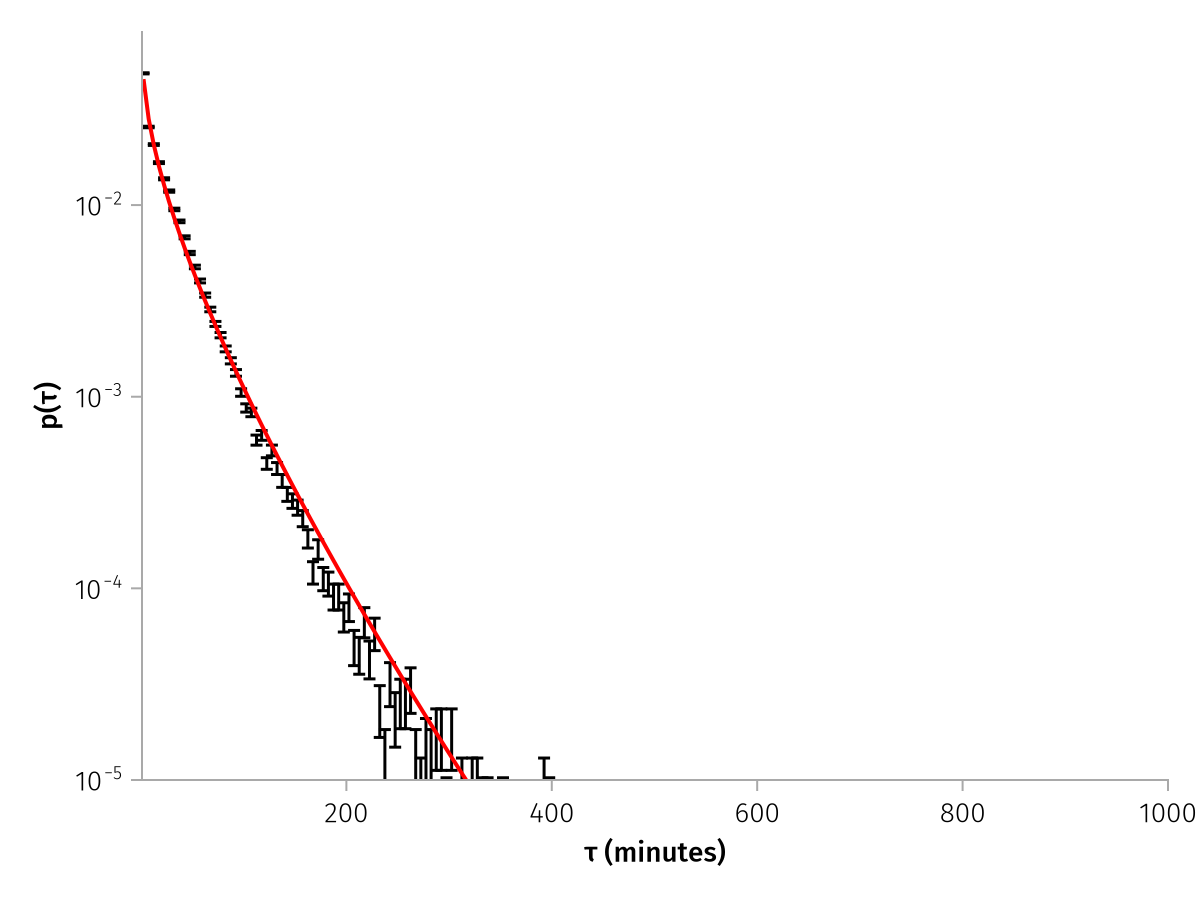

In [53]:
f1 = plot_wt_pdf_lim(df)
f2 = plot_wt_pdf_lim(df, dist=Weibull)
display.([f1, f2]);

In [1]:
f1 = plot_wt_pdf(df_s2 |> waiting_time)
f2 = plot_wt_pdf(df_s2 |> waiting_time, xscale = log10)
display.([f1, f2]);

UndefVarError: UndefVarError: `df_s2` not defined

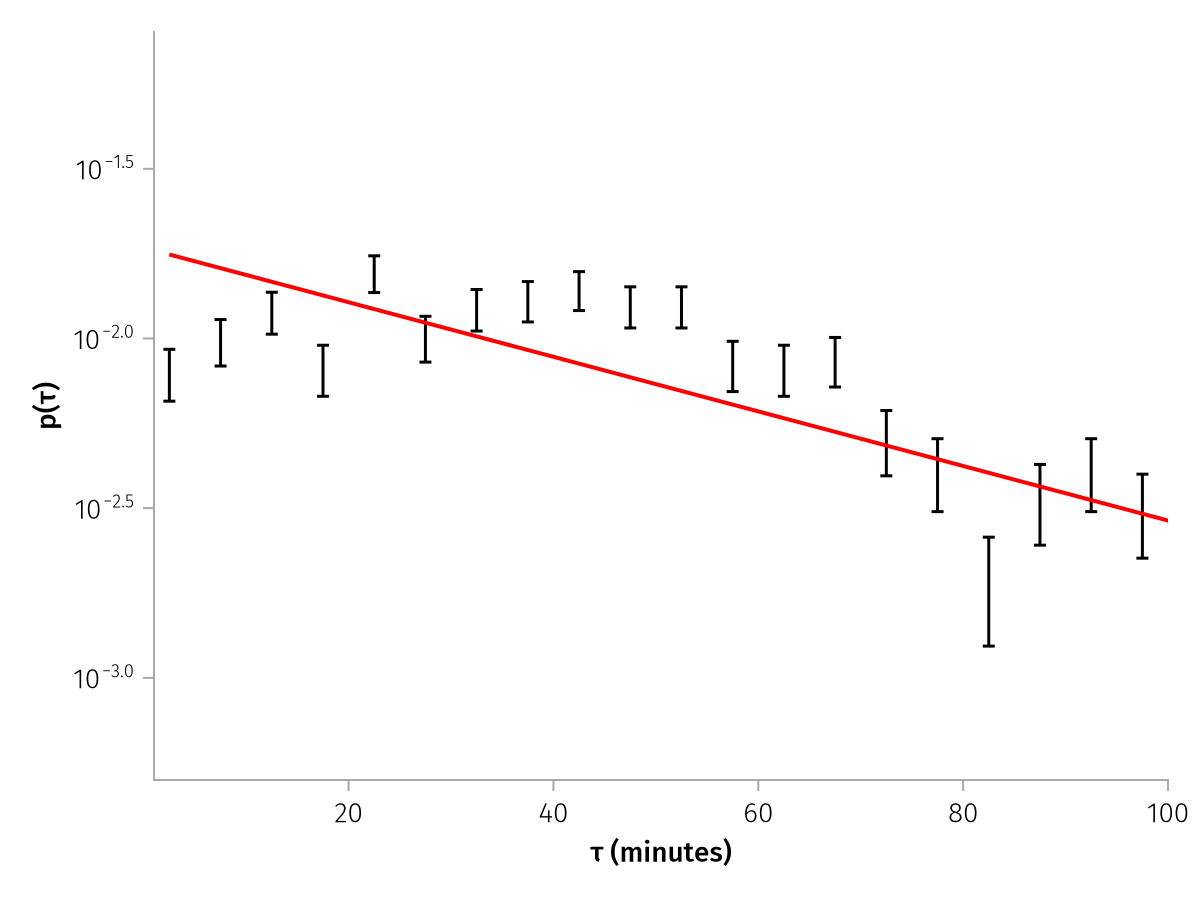

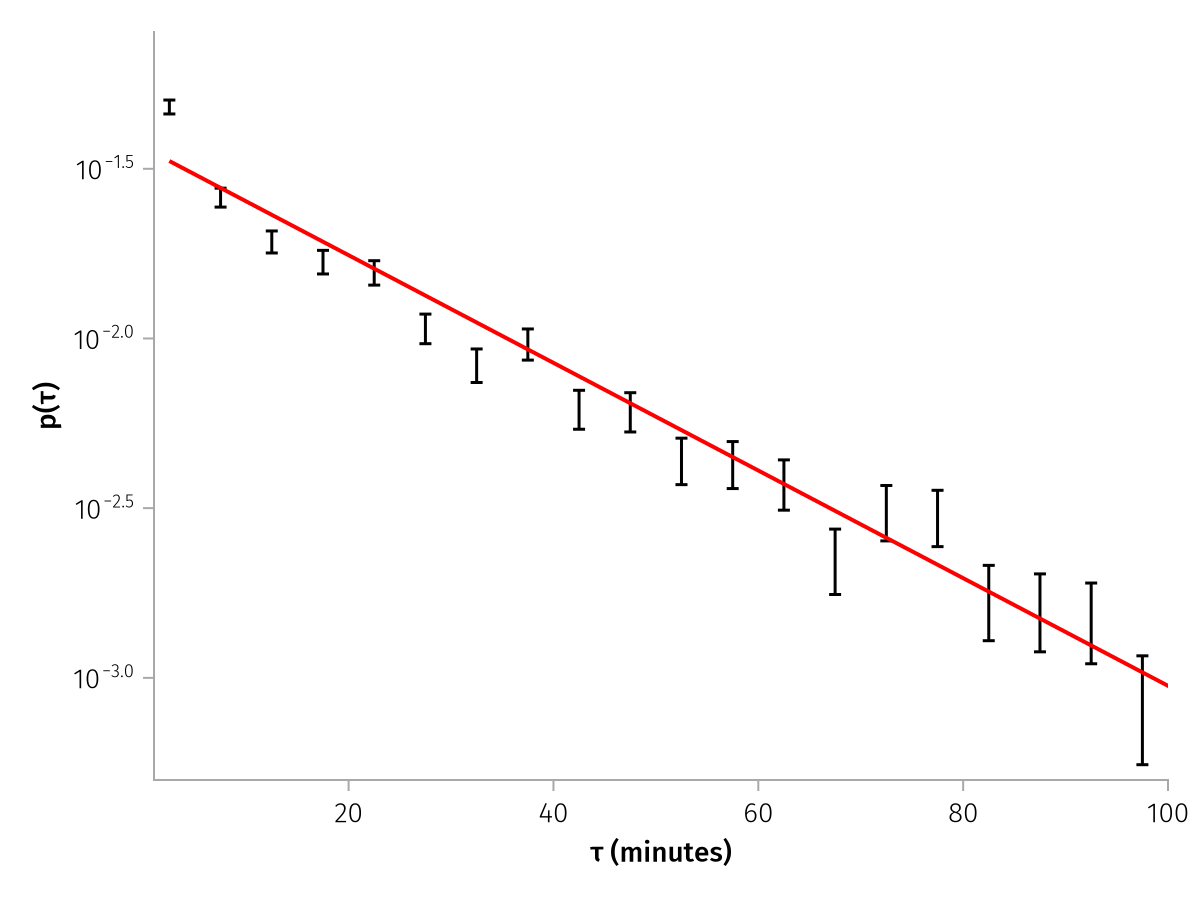

In [52]:
df1 = subset_time(jno_df, Date(2011, 9, 30))
df2 = subset_time(wind_df, Date(2011, 9, 30))
dfs = [ df1, df2 ]
fgs = dfs .|> waiting_time .|> plot_wt_pdf 
display.(fgs);